Running backtester ... 


C:\Users\Yang He\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Yang He\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


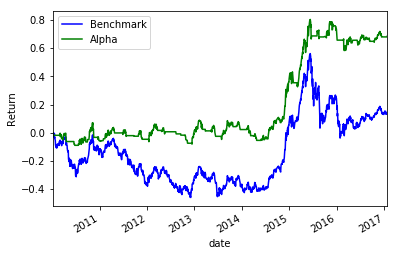

--------- Alpha Metrics --------
sharp:  0.0404493439323601
alpha:  -0.000308101734228
beta:   1.00125724066


In [9]:
import sys
sys.path.append("..")
import max.alpha as ap
import max.datacenter.datacenter as dc
import max.backtester as bt
import datetime as dt
import numpy as np

d = dc.DataCenter('2010-01-01','2017-02-01')
class newalpha(ap.Alpha):
    def cal(self, date):
        days = 30
        start_date = date - dt.timedelta(days=days)
        end_date = date - dt.timedelta(days=1)
        mkt_data = self.historic_mkt_return[start_date:end_date]
        
        self.alpha = np.average(mkt_data, axis=0)
        
new = newalpha('a1', ['sh'], d) #alpha name, code, datacenter

rule = bt.Rule()
backtest = bt.Backtester(new,rule)

backtest.backtest()